In [1]:
import numpy as np
import pandas as pd 
import datetime
from tqdm import tqdm
import pandas_datareader.naver as web_naver
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.set(rc={'figure.figsize':(20,10)})
# pd.set_option('display.max_columns', None)

In [2]:
start = '2008-12-01'
end = '2021-11-30'

In [4]:
price_daily=pd.read_csv('price_panel.csv',index_col=0,parse_dates=True)
price_daily

,014160,003560,004370,013360,003640,005385,003547,112610,014990,013240,...,004710,170900,185750,136490,210540,267250,004105,005930,006805,006375
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,235,1400,229000,445,13600.0,12850,4835,NaN,1532,1460.0,...,9400,NaN,NaN,NaN,NaN,NaN,268.0,9530,3370,105000.0
2008-12-02,220,1345,230000,445,12850.0,12200,4700,NaN,1532,1410.0,...,8585,NaN,NaN,NaN,NaN,NaN,279.0,9080,3174,102000.0
2008-12-03,215,1390,229500,461,13300.0,12100,4800,NaN,1400,1415.0,...,8585,NaN,NaN,NaN,NaN,NaN,291.0,8820,3300,105500.0
2008-12-04,220,1330,222500,473,13000.0,12400,4595,NaN,1400,1385.0,...,8380,NaN,NaN,NaN,NaN,NaN,290.0,8610,3108,104500.0
2008-12-05,225,1390,242000,433,13350.0,12700,4655,NaN,1400,1365.0,...,8245,NaN,NaN,NaN,NaN,NaN,300.0,8540,3150,101500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-24,2630,1710,292500,6340,NaN,98100,17500,60400.0,1395,NaN,...,6330,71400.0,106909.0,11350.0,13400.0,57300.0,2610.0,74800,5760,NaN
2021-11-25,2545,1685,292000,6140,NaN,97400,17400,60100.0,1405,NaN,...,6300,72400.0,106909.0,11100.0,13250.0,57100.0,2620.0,73700,5750,NaN
2021-11-26,2700,1595,286500,6320,NaN,95200,17200,58500.0,1345,NaN,...,6180,71400.0,106432.0,10600.0,12800.0,55100.0,2500.0,72300,5610,NaN


In [5]:
price_month=pd.read_csv('price_panel_monthend.csv',index_col=0,parse_dates=True)
price_month.head()

,014160,003560,004370,013360,003640,005385,003547,112610,014990,013240,...,004710,170900,185750,136490,210540,267250,004105,005930,006805,006375
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-30,235,1540,244500,540,14400.0,12800,5600,NaN,1015,2110.0,...,8822,NaN,NaN,NaN,NaN,NaN,326.0,9020,3613,97000.0
2009-01-30,275,1285,200500,539,14150.0,13700,6550,NaN,1005,2035.0,...,11673,NaN,NaN,NaN,NaN,NaN,290.0,9760,4671,91000.0
2009-02-27,265,1210,227000,545,12000.0,15150,6310,NaN,855,1705.0,...,12352,NaN,NaN,NaN,NaN,NaN,278.0,9540,4185,97800.0
2009-03-31,315,1170,215000,620,13600.0,18600,6520,NaN,1100,2310.0,...,18154,NaN,NaN,NaN,NaN,NaN,285.0,11360,5164,93000.0
2009-04-30,400,1360,216000,715,17650.0,20800,6950,NaN,1245,3315.0,...,16898,NaN,NaN,NaN,NaN,NaN,351.0,11840,5588,118500.0


한달 간격으로 각 주식의 표준편차를 계산하자

In [6]:
def price_std(price_daily):
    price_std=pd.DataFrame(index=price_month.index,columns=price_month.columns)
    for month in price_month.index:
        std=price_daily[str(month)[:7]].std()
        price_std.loc[month,:]=std
    return price_std

포트폴리오 구성

In [7]:
def portfolio_construction(price_daily,price_month,start,end):
    rtn=np.log(price_month/price_month.shift(1))*100
    date_retur_tickers=dict()
    df_std=pd.DataFrame(index=price_month.index,columns=price_month.columns)

    for month in price_month.index:
        std=price_daily[str(month)[:7]].std()
        df_std.loc[month,:]=std
    
    df_std=df_std.astype(float)


    rtn=rtn.reindex(df_std.index)
    for i in range(len(df_std)):
        winners=df_std.iloc[i].dropna().rank(method='first',ascending=False)\
        [(df_std.iloc[i].dropna().rank(method='first',ascending=False)<end)&\
        ((df_std.iloc[i].dropna().rank(method='first',ascending=False)>=start))].index.values
        winners=list(winners)

        date_retur_tickers[rtn.index[i]]=\
            [[np.dot(rtn.iloc[i].reindex(winners).fillna(-99).values,np.array([1/len(winners) for i in range(len(winners))]))],winners]
    
    return date_retur_tickers

    

    
    

In [8]:
high_vol = portfolio_construction(price_daily=price_daily, price_month=price_month,start=20,end=40)

C:\Users\lsh\AppData\Local\Temp/ipykernel_12784/1220404153.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  std=price_daily[str(month)[:7]].std()


In [9]:
middle_vol=portfolio_construction(price_daily=price_daily,price_month=price_month,start=40,end=60)

C:\Users\lsh\AppData\Local\Temp/ipykernel_12784/1220404153.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  std=price_daily[str(month)[:7]].std()


In [10]:
low_vol=portfolio_construction(price_daily=price_daily,price_month=price_month,start=60,end=80)

C:\Users\lsh\AppData\Local\Temp/ipykernel_12784/1220404153.py:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  std=price_daily[str(month)[:7]].std()


리벨런싱시 편입과 퇴출

In [11]:
print('high_vol')
for i in range(1,len(high_vol.keys())):
    print(list(high_vol.keys())[i])
    sub=len([x for x in high_vol[list(high_vol.keys())[i]][1] if x not in high_vol[list(high_vol.keys())[i-1]][1]])
    print(f'교체비율: {sub/20}')
    print('편입',[x for x in high_vol[list(high_vol.keys())[i]][1] if x not in high_vol[list(high_vol.keys())[i-1]][1]])
    print('퇴출',[x for x in high_vol[list(high_vol.keys())[i-1]][1] if x not in high_vol[list(high_vol.keys())[i]][1]])



high_vol
2009-01-30 00:00:00
교체비율: 0.55
편입 ['004370', '012805', '000810', '012405', '003925', '007595', '011200', '002535', '002530', '002365', '025620']
퇴출 ['009815', '097959', '005350', '097957', '016385', '006390', '097950', '051900', '004170', '012170', '009190']
2009-02-27 00:00:00
교체비율: 0.45
편입 ['003600', '042660', '005620', '000685', '016385', '017555', '097950', '004170', '077970']
퇴출 ['004370', '012805', '002797', '000810', '005960', '002530', '001470', '002365', '025620']
2009-03-31 00:00:00
교체비율: 0.35
편입 ['012805', '097959', '002270', '005960', '010130', '001470', '109070']
퇴출 ['042660', '005620', '003925', '007595', '000685', '016385', '077970']
2009-04-30 00:00:00
교체비율: 0.7
편입 ['025560', '005490', '000670', '097230', '036570', '002530', '077970', '002995', '018415', '003920', '025620', '002410', '009190', '006375']
퇴출 ['003600', '023530', '097959', '012405', '011200', '009540', '005960', '097950', '010130', '001440', '004170', '001470', '002380', '109070']
2009-05-29 00:00

In [12]:
print('middle_vol')
for i in range(1,len(middle_vol.keys())):
    print(list(middle_vol.keys())[i])
    sub=len([x for x in middle_vol[list(middle_vol.keys())[i]][1] if x not in middle_vol[list(middle_vol.keys())[i-1]][1]])
    print(f'교체비율: {sub/20}')
    print('편입',[x for x in middle_vol[list(middle_vol.keys())[i]][1] if x not in middle_vol[list(middle_vol.keys())[i-1]][1]])
    print('퇴출',[x for x in middle_vol[list(middle_vol.keys())[i-1]][1] if x not in middle_vol[list(middle_vol.keys())[i]][1]])

middle_vol
2009-01-30 00:00:00
교체비율: 0.55
편입 ['097959', '030790', '011070', '097957', '004965', '097950', '051900', '077970', '001130', '009190', '006375']
퇴출 ['004370', '003940', '012805', '000210', '012330', '000810', '000480', '000815', '051910', '005300', '002365']
2009-02-27 00:00:00
교체비율: 0.55
편입 ['004370', '006360', '003940', '013005', '010620', '000810', '005960', '002530', '001470', '007310', '002365']
퇴출 ['042660', '005620', '015540', '017555', '097950', '051900', '004690', '077970', '002995', '018415', '009190']
2009-03-31 00:00:00
교체비율: 0.8
편입 ['042660', '005620', '000150', '003925', '037620', '005350', '011170', '066570', '069960', '036570', '007195', '077970', '108070', '096770', '012170', '006260']
퇴출 ['006360', '003940', '013005', '010620', '097959', '030790', '002270', '011070', '097957', '004965', '005960', '002530', '001470', '002365', '001130', '006375']
2009-04-30 00:00:00
교체비율: 0.85
편입 ['023530', '067250', '011200', '000685', '009540', '001460', '006400', '011070'

In [13]:
print('low_vol')
for i in range(1,len(low_vol.keys())):
    print(list(low_vol.keys())[i])
    sub=len([x for x in low_vol[list(low_vol.keys())[i]][1] if x not in low_vol[list(low_vol.keys())[i-1]][1]])
    print(f'교체비율: {sub/20}')
    print('편입',[x for x in low_vol[list(low_vol.keys())[i]][1] if x not in low_vol[list(low_vol.keys())[i-1]][1]])
    print('퇴출',[x for x in low_vol[list(low_vol.keys())[i-1]][1] if x not in low_vol[list(low_vol.keys())[i]][1]])

low_vol
2009-01-30 00:00:00
교체비율: 0.7
편입 ['103160', '000210', '012330', '000480', '005350', '006400', '051910', '066570', '006390', '036570', '010130', '007310', '006040', '003550']
퇴출 ['013005', '001040', '011160', '011200', '017940', '000685', '011170', '069960', '004965', '004200', '077970', '003070', '005965', '006260']
2009-02-27 00:00:00
교체비율: 0.8
편입 ['004890', '068870', '011050', '037620', '034020', '001460', '015540', '011170', '012400', '051900', '007195', '005300', '004690', '002995', '025620', '002410']
퇴출 ['103160', '003600', '006360', '000210', '012330', '000480', '005350', '000720', '006400', '051910', '066570', '010130', '007310', '006040', '003550', '003965']
2009-03-31 00:00:00
교체비율: 0.8
편입 ['006360', '007570', '010620', '016360', '000210', '018670', '000685', '051910', '011330', '005900', '017800', '003830', '018415', '001130', '006040', '001720']
퇴출 ['004890', '068870', '011050', '000150', '037620', '001460', '015540', '011170', '012400', '006390', '036570', '007195'

KOSPI

In [14]:
kospi=web_naver.NaverDailyReader(symbols='KOSPI', start=start,end=end,adjust_price=True)
kospi=kospi.read()
kospi=kospi.astype(float)

In [15]:
kospi=kospi.loc[price_month.index,:]['Close']
kospi

Date
2008-12-30    1124.47
2009-01-30    1162.11
2009-02-27    1063.03
2009-03-31    1206.26
2009-04-30    1369.36
               ...   
2021-07-30    3202.32
2021-08-31    3199.27
2021-09-30    3068.82
2021-10-29    2970.68
2021-11-30    2839.01
Name: Close, Length: 156, dtype: float64

기초통계

In [16]:
portfolio=pd.DataFrame(index=price_month.index)
portfolio['high_volatility']=pd.Series(np.array([rtn[0] for rtn in list(high_vol.values())]).flatten(),index=high_vol.keys())
portfolio['middle_volatility']=pd.Series(np.array([rtn[0] for rtn in list(middle_vol.values())]).flatten(),index=middle_vol.keys())
portfolio['low_volatility']=pd.Series(np.array([rtn[0] for rtn in list(low_vol.values())]).flatten(),index=low_vol.keys())
portfolio['KOSPI']=np.log(kospi/kospi.shift(1))*100

In [17]:
print("mean","\n",portfolio.mean())
print("")
print("std","\n",portfolio.std())
print("")
print("skewness","\n",portfolio.skew())
print("")
print("kurtosis","\n",portfolio.kurtosis())
print("")
print("sharpe ratio","\n", portfolio.mean() / portfolio.std())

mean 
 high_volatility      0.725431
middle_volatility    1.243876
low_volatility       0.688425
KOSPI                0.597512
dtype: float64

std 
 high_volatility      12.170860
middle_volatility    11.142025
low_volatility       11.284729
KOSPI                 4.515614
dtype: float64

skewness 
 high_volatility     -3.436328
middle_volatility   -4.701401
low_volatility      -4.554588
KOSPI               -0.080701
dtype: float64

kurtosis 
 high_volatility      28.245080
middle_volatility    41.615096
low_volatility       38.697074
KOSPI                 1.387630
dtype: float64

sharpe ratio 
 high_volatility      0.059604
middle_volatility    0.111638
low_volatility       0.061005
KOSPI                0.132321
dtype: float64


<AxesSubplot:xlabel='Date'>

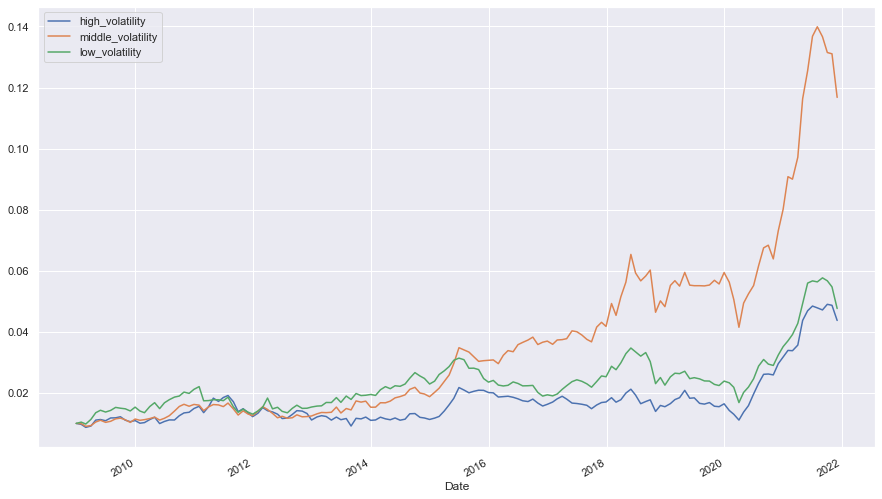

In [18]:
cum_rtn=portfolio[['high_volatility','middle_volatility','low_volatility']]/100
(1+cum_rtn).cumprod().plot(figsize=(15,9))